In [2]:
# 1. Importação de Bibliotecas e Preparação do Ambiente

import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import json
import string

# Download de recursos da NLTK (necessário apenas na primeira execução)
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')



In [3]:
with open(r'JsonSoup/JsonRacas/lemma/dwarf_lemmatized_structured.json', 'r') as file_object:
        jsonCarregado = json.load(file_object)

def extract_strings(obj):
    if isinstance(obj, str):
        yield obj
    elif isinstance(obj, dict):
        for v in obj.values():
            yield from extract_strings(v)
    elif isinstance(obj, list):
        for item in obj:
            yield from extract_strings(item)

# Turn into a list (corpus)
corpusAux = list(extract_strings(jsonCarregado))

corpus = [
    s.translate(str.maketrans("", "", string.punctuation))
    for s in corpusAux
]

stemmer = PorterStemmer()
# Carrega a lista de stopwords original da NLTK
english_stop_words_original = set(stopwords.words('english'))
english_stop_words_original.update(string.punctuation)

stop_words_stemmed = [stemmer.stem(word) for word in english_stop_words_original]

def stem_tokenizer(text):
    tokens = text.split()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

bow_vec = CountVectorizer(
    lowercase=True,
    stop_words=stop_words_stemmed,  # Usa a lista de stopwords corrigida
    tokenizer=stem_tokenizer
)
X_bow = bow_vec.fit_transform(corpus)
df_bow = pd.DataFrame(X_bow.toarray(), columns=bow_vec.get_feature_names_out())

print("Matriz Documento-Termo (BoW):")
df_bow



Matriz Documento-Termo (BoW):


C:\Users\deant\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\deant\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['becau'] not in stop_words.
  warnings.warn(


,1,150,2,25,350,4,5,50,60,abil,...,well,wellord,whatev,whenev,wisdom,within,write,year,young,–
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
5,0,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
tfidf_vec = TfidfVectorizer(
    lowercase=True,
    stop_words=stop_words_stemmed, # Usa a lista de stopwords corrigida
    tokenizer=stem_tokenizer
)
X_tfidf = tfidf_vec.fit_transform(corpus)
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vec.get_feature_names_out())

print("Matriz Documento-Termo (TF-IDF):")
df_tfidf.round(3)

Matriz Documento-Termo (TF-IDF):


C:\Users\deant\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\deant\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['becau'] not in stop_words.
  warnings.warn(


,1,150,2,25,350,4,5,50,60,abil,...,well,wellord,whatev,whenev,wisdom,within,write,year,young,–
0,0.000,0.00,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0.000,0.00,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.201
2,0.000,0.00,0.331,0.000,0.000,0.00,0.00,0.000,0.000,0.299,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,0.000,0.00,0.000,0.000,0.255,0.00,0.00,0.255,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.255,0.255,0.000
4,0.000,0.00,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,...,0.186,0.211,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5,0.000,0.28,0.000,0.000,0.000,0.28,0.28,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
6,0.000,0.00,0.000,0.247,0.000,0.00,0.00,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
7,0.000,0.00,0.000,0.000,0.000,0.00,0.00,0.000,0.157,0.000,...,0.000,0.000,0.000,0.000,0.000,0.157,0.000,0.000,0.000,0.000
8,0.000,0.00,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
9,0.000,0.00,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [5]:
def search_and_rank(query, vectorizer, X_corpus, corpus, method_name):
    """
    Vetoriza uma query, calcula a similaridade com o corpus e exibe os resultados.
    """
    q_vec = vectorizer.transform([query])
    sim_scores = cosine_similarity(q_vec, X_corpus).ravel()
    rank = np.argsort(sim_scores)[::-1]

    print(f"Top-3 Similares para a Query (usando {method_name}):")
    for i in rank[:3]:
        if sim_scores[i] > 0.01: # Apenas mostra se houver alguma similaridade
            print(f"  Doc{i+1} (score={sim_scores[i]:.3f}): {corpus[i]}")
    print("-" * 40)

query = 'I am a dwarf and im digging a hole'
print(f">> Executando busca para a query: '{query}'\n")
search_and_rank(query, bow_vec, X_bow, corpus, "BoW")
search_and_rank(query, tfidf_vec, X_tfidf, corpus, "TF-IDF")

>> Executando busca para a query: 'I am a dwarf and im digging a hole'

Top-3 Similares para a Query (usando BoW):
  Doc18 (score=0.707): Mountain Dwarf
  Doc14 (score=0.707): Hill Dwarf
  Doc19 (score=0.583): As a mountain dwarf you re strong and hardy accustom to a difficult life in rugged terrain You re probably on the tall side for a dwarf and tend toward lighter coloration The shield dwarf of northern Faerun a well a the ruling Hylar clan and the noble Daewar clan of Dragonlance be mountain dwarf
----------------------------------------
Top-3 Similares para a Query (usando TF-IDF):
  Doc18 (score=0.597): Mountain Dwarf
  Doc14 (score=0.558): Hill Dwarf
  Doc19 (score=0.419): As a mountain dwarf you re strong and hardy accustom to a difficult life in rugged terrain You re probably on the tall side for a dwarf and tend toward lighter coloration The shield dwarf of northern Faerun a well a the ruling Hylar clan and the noble Daewar clan of Dragonlance be mountain dwarf
--------------

Calculando a matriz de similaridade de cossenos...


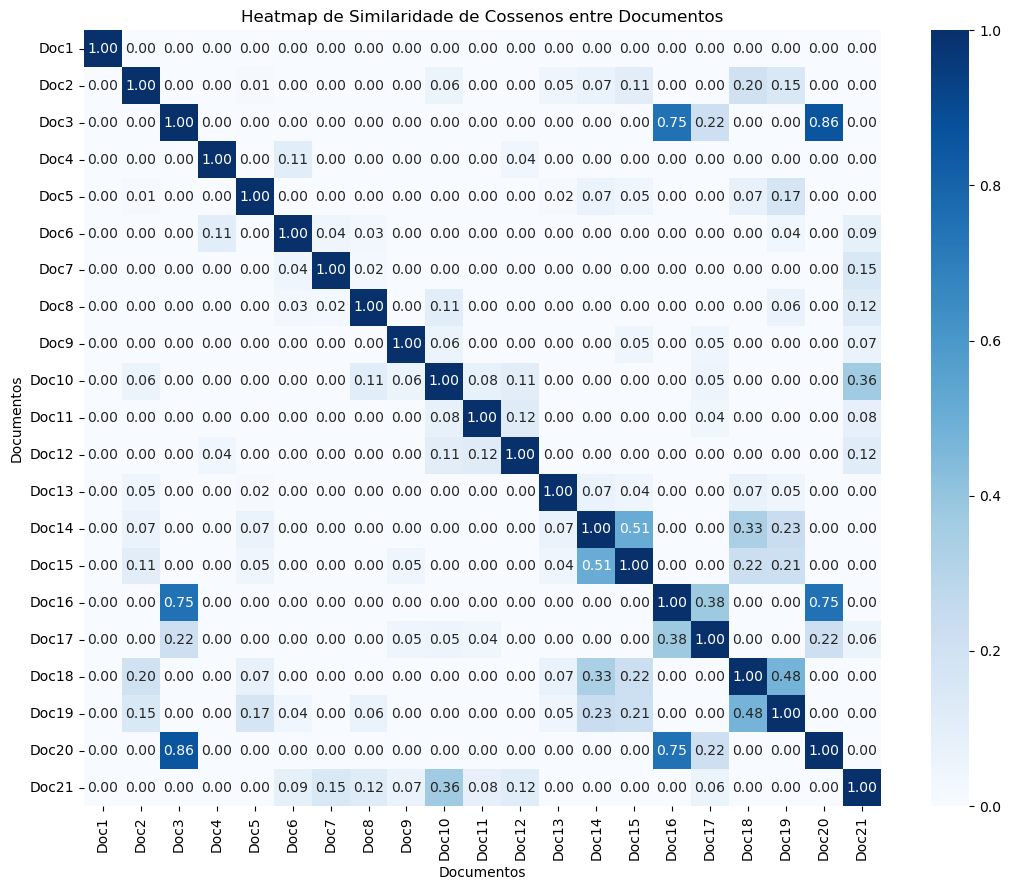

In [6]:
# 7. Visualizações

# a) Heatmap da Similaridade de Cossenos entre Documentos
# Primeiro, calculamos a matriz de similaridade (documento x documento) usando a matriz TF-IDF
print("Calculando a matriz de similaridade de cossenos...")
sim_matrix = cosine_similarity(X_tfidf, X_tfidf)

# Para melhor visualização, criamos um DataFrame com os rótulos corretos
doc_labels = [f"Doc{i+1}" for i in range(len(corpus))]
df_similarity = pd.DataFrame(sim_matrix, index=doc_labels, columns=doc_labels)

# Agora, geramos o heatmap a partir dessa matriz de similaridade
plt.figure(figsize=(11, 9))
sns.heatmap(
    df_similarity,
    annot=True,          # Exibe os valores de similaridade nas células
    cmap="Blues",        # Mapa de cores em tons de azul
    fmt=".2f"            # Formata os números com duas casas decimais
)
plt.title("Heatmap de Similaridade de Cossenos entre Documentos")
plt.xlabel("Documentos")
plt.ylabel("Documentos")
plt.tight_layout()
plt.show()

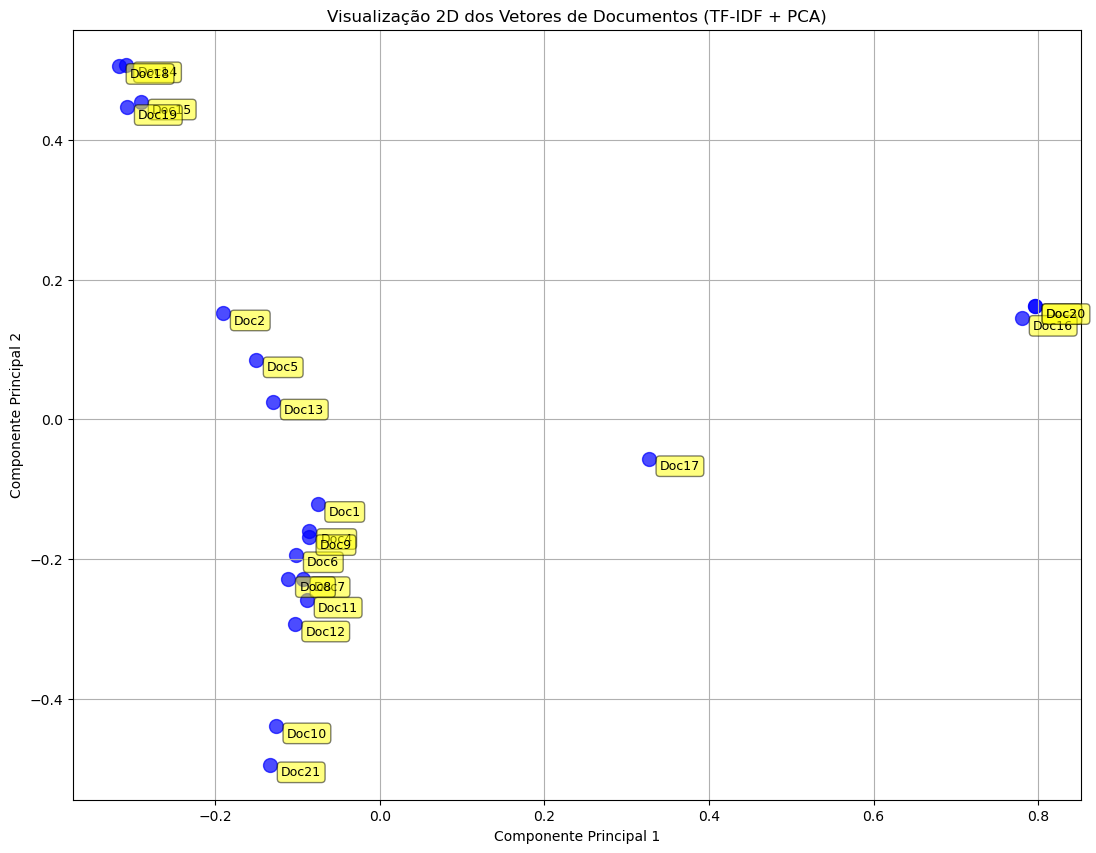

In [7]:
# b) Visualização dos Documentos em 2D com PCA
pca = PCA(n_components=2)
# Usamos .toarray() para converter a matriz esparsa para uma matriz densa
X_tfidf_pca = pca.fit_transform(X_tfidf.toarray())

plt.figure(figsize=(13, 10))
plt.scatter(X_tfidf_pca[:, 0], X_tfidf_pca[:, 1], c='blue', alpha=0.7, s=100)
plt.title("Visualização 2D dos Vetores de Documentos (TF-IDF + PCA)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)


# Adiciona anotações para cada ponto
for i, _ in enumerate(corpus):
    plt.annotate(f"Doc{i+1}", (X_tfidf_pca[i, 0], X_tfidf_pca[i, 1]),
                 xytext=(8, -8), textcoords='offset points', fontsize=9,
                 bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.5))
plt.show()

## Análise  

### Cluster de Similaridade (Documentos 3, 16 e 20)  
No canto direito, há um cluster de 3 linhas extremamente semelhantes:  

- **Doc3:** "Ability Score Increase. Your Constitution score increases by 2."  
- **Doc16:** "Ability Score Increase. Your Wisdom score increases by 1."  
- **Doc20:** "Ability Score Increase. Your Strength score increases by 2."  

Isso mostra que o modelo consegue localizar frases similares com sucesso.  

---

### Outro caso de alta similaridade (Doc10 e Doc21)  
- **Doc10:** "Dwarven Combat Training. You have proficiency with the battleaxe, handaxe, light hammer, and warhammer."  
- **Doc21:** "Dwarven Armor Training. You have proficiency with light and medium armor."  

---

### Caso de baixa similaridade (Doc11 e Doc12)  
- **Doc11:** "Darkvision. Accustomed to life underground, you have superior vision in dark and dim conditions. You can see in dim light within 60 feet of you as if it were bright light, and in darkness as if it were dim light. You can't discern color in darkness, only shades of gray."  
- **Doc12:** "Dwarven Resilience. You have advantage on saving throws against poison, and you have resistance against poison damage."  

Apesar de estarem próximos no espaço visual, a similaridade entre eles foi apenas **0.12** no heatmap, o que demonstra que realmente não há forte relação entre os conteúdos em duas dimenções.
Houvessem mais, provavelmente estes valores estariam distantes em outros eixos.


***Usando os tokens com lemming***

In [10]:
with open(r'JsonSoup/JsonRacas/lemma/dwarf_lemmatized_structured.json', 'r') as file_object:
        jsonCarregado = json.load(file_object)

def extract_strings(obj):
    if isinstance(obj, str):
        yield obj
    elif isinstance(obj, dict):
        for v in obj.values():
            yield from extract_strings(v)
    elif isinstance(obj, list):
        for item in obj:
            yield from extract_strings(item)

# Turn into a list (corpus)
corpusAux = list(extract_strings(jsonCarregado))

corpus2 = [
    s.translate(str.maketrans("", "", string.punctuation))
    for s in corpusAux
]

Calculando a matriz de similaridade de cossenos...


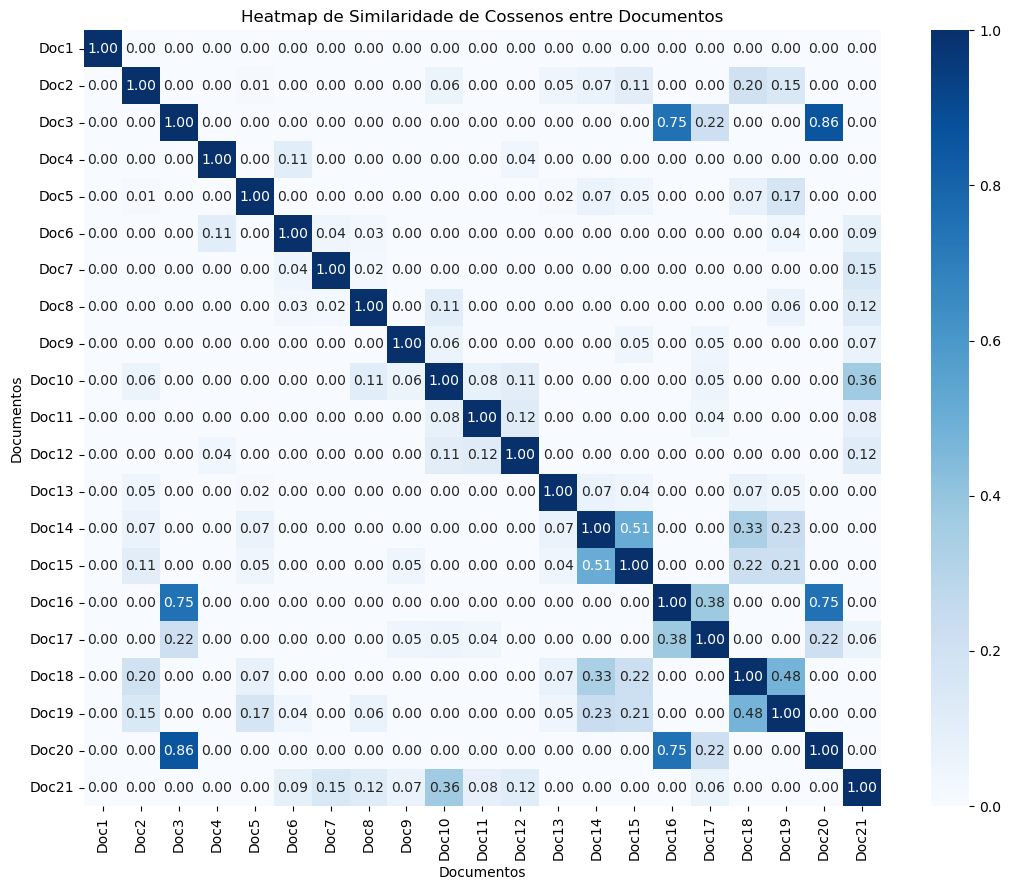

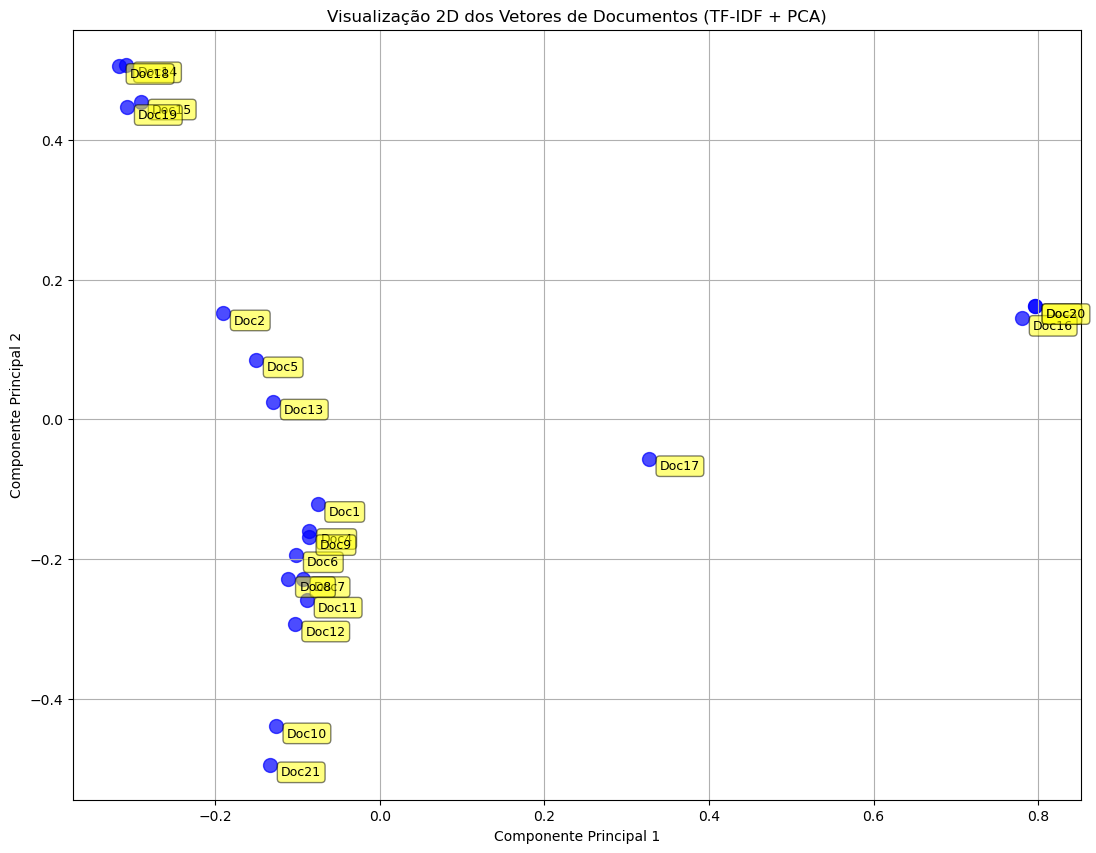

In [11]:
# a) Heatmap da Similaridade de Cossenos entre Documentos
# Primeiro, calculamos a matriz de similaridade (documento x documento) usando a matriz TF-IDF
print("Calculando a matriz de similaridade de cossenos...")
sim_matrix = cosine_similarity(X_tfidf, X_tfidf)

# Para melhor visualização, criamos um DataFrame com os rótulos corretos
doc_labels = [f"Doc{i+1}" for i in range(len(corpus2))]
df_similarity = pd.DataFrame(sim_matrix, index=doc_labels, columns=doc_labels)

# Agora, geramos o heatmap a partir dessa matriz de similaridade
plt.figure(figsize=(11, 9))
sns.heatmap(
    df_similarity,
    annot=True,          # Exibe os valores de similaridade nas células
    cmap="Blues",        # Mapa de cores em tons de azul
    fmt=".2f"            # Formata os números com duas casas decimais
)
plt.title("Heatmap de Similaridade de Cossenos entre Documentos")
plt.xlabel("Documentos")
plt.ylabel("Documentos")
plt.tight_layout()
plt.show()


# b) Visualização dos Documentos em 2D com PCA
pca = PCA(n_components=2)
# Usamos .toarray() para converter a matriz esparsa para uma matriz densa
X_tfidf_pca = pca.fit_transform(X_tfidf.toarray())

plt.figure(figsize=(13, 10))
plt.scatter(X_tfidf_pca[:, 0], X_tfidf_pca[:, 1], c='blue', alpha=0.7, s=100)
plt.title("Visualização 2D dos Vetores de Documentos (TF-IDF + PCA)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)


# Adiciona anotações para cada ponto
for i, _ in enumerate(corpus2):
    plt.annotate(f"Doc{i+1}", (X_tfidf_pca[i, 0], X_tfidf_pca[i, 1]),
                 xytext=(8, -8), textcoords='offset points', fontsize=9,
                 bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.5))
plt.show()

### Análise  

Observa-se que os resultados são similares aos obtidos com as palavras antes do processo de *lemmatization*. Há diferenças, mas são sutis.  

---

### Cluster de Similaridade (Doc3, 16 e 20)  
O agrupamento de 3 linhas semelhantes (**Doc3, 16 e 20**) continua de maneira idêntica.  

---

### Similaridade entre Doc10 e Doc21  
Nos documentos **Doc10** e **Doc21**, houve um leve deslocamento para a direita.  
- A relação entre eles no *heatmap* é de **0,36**.  

---

### Deslocamento de Doc15 e Doc19  
Nota-se um deslocamento para cima dos **Doc15** e **Doc19**, aproximando-os de **Doc14** e **Doc18**.  

- **Doc15:** "As a hill dwarf, you have keen sens, deep intuition, and remarkable resilience. The gold dwarf of Faerun in their mighty southern kingdom be hill dwarf, a be the exile Neidar and the debase Klar of Krynn in the Dragonlance set."  
- **Doc19:** "As a mountain dwarf, you 're strong and hardy, accustom to a difficult life in rugged terrain. You 're probably on the tall side( for a dwarf), and tend toward lighter coloration, The shield dwarf of northern Faerun, a well a the ruling Hylar clan and the noble Daewar clan of Dragonlance, be mountain dwarf."  
- **Doc14:** "Hill Dwarf"  
- **Doc18:** "Mountain Dwarf"  

Estes são exemplos de **sub-raças (14 e 18)** e suas respectivas **descrições (15 e 19)**. Faz sentido, portanto, que estejam próximas nestes dois eixos.  

---

### Consideração Geral  
De maneira geral, não houveram grandes diferenças entre as duas versões.  


